In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import os
import textwrap
import seaborn as sns

blues = ["#0d88e6", "#8ECDDD", "#22668D", "#42d4f4", ]
COLORS_20 = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c',
             '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1',
             '#000075', '#808080', '#ffffff', '#000000']
semi_balck = '#4F6272'

In [ ]:
import matplotlib
plt.rcParams.update(matplotlib.rcParamsDefault)

In [ ]:
results_path = "/Volumes/noamaz/modularity/retina_xor/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'

task = "retina"
num_layers = '3'
n_features =6
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")
res_folder = f"retina_{num_layers}_layers"
plot_path = f"{local_base_path}/plots/retina_xor_multi_arch/{res_folder}"

In [ ]:
first_analsis_res_folder = f"{results_path}/{res_folder}/first_analysis_results"
first_analsis_file_name = f"2023-10-24-10-00-54_all_results_from_teach_archs_results_with_motifs_5000_ep_no_duplicates.csv"

In [ ]:
lgbm_folder_name = 'exp_2023-11-27-14-40-47_nice_features'
lgb_res_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}"
lgb_res_nn_path = f"{lgb_res_path}/teach_archs_regression_feature_selection_results"

In [ ]:
corrlated_features_values = pd.read_csv(
    f"{results_path}/{res_folder}/feature_correlation/2023-11-28-16-07-16_all_data.csv")
correlated_features_csv_name = "2023-11-28-13-17-26_feature_correlation.csv"
correlated_features = pd.read_csv(f"{results_path}/{res_folder}/feature_correlation/{correlated_features_csv_name}",
                                  index_col=0)

In [ ]:
first_analsis = pd.read_csv(f"{first_analsis_res_folder}/{first_analsis_file_name}").rename(
    columns={'connectivity_ratio': 'density',
             }).sort_values('mean_performance', ascending=False)
first_analsis.shape

In [ ]:
x_metric_name = 'density'
y_metric_name = 'mean_performance'

x_data = first_analsis[x_metric_name]
means_y = []
mean_x = []
for x in sorted(first_analsis[x_metric_name].unique()):
    means_y.append(first_analsis[y_metric_name][x_data == x].mean())
    mean_x.append(x)
#x_data = x_data + np.random.normal(-0.008, 0.008, x_data.shape[0])
plt.scatter(x_data, first_analsis[y_metric_name], c=blues[1], s=0.5, label='architecture mean performance')

plt.plot(mean_x, means_y, c=blues[2], label='mean over density')
plt.legend()
plt.ylabel("Network's mean performance", fontsize=16)
plt.xlabel('Density', fontsize=16)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.title(
    f"{task.capitalize()}",
    wrap=True, fontsize=16)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_{y_metric_name}_vs_{x_metric_name}.png")
plt.show()

In [ ]:
plt.hist(first_analsis['mean_performance'], color=blues[1], bins=30)
plt.xlabel('Mean performance', fontsize=16)
plt.ylabel('Number of networks', fontsize=16)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
#plt.title(f"{task.capitalize()}", fontsize=14)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_mean_performance_hist.png")
plt.show()

In [ ]:
neurons_feature_names = [f'neurons_in_layer_{i}' for i in range(1, int(num_layers))]
dims = [f"{i}_{j}" for i, j, in first_analsis[neurons_feature_names].values.tolist()]
dims.sort()
dims_to_num = {
    dim: i + 1
    for i, dim in enumerate(set(dims))
}
first_analsis['dims'] = dims

In [ ]:
plt.hist(first_analsis['dims'], color=blues[1], bins=len(set(dims)), align='mid', rwidth=0.95)
plt.xticks(rotation=45)
plt.xlabel('dimensions', fontsize=14)
plt.ylabel('Number of networks', fontsize=14)
#axs[k].set_xlabel(f_name,  fontsize=14)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_dims_hist.png")
plt.show()

In [ ]:
selected_features_res = pd.read_csv(f"{lgb_res_path}/6_feature_values.csv").drop("Unnamed: 0", axis=1)

In [ ]:
selected_feature_names = list(selected_features_res.columns)[:-1]

In [ ]:
num_columns = int(np.ceil(len(selected_feature_names) / 3))
fig, axs = plt.subplots(num_columns, 3, figsize=(12, 10), sharey='all')
min_x = 1.0
max_x = 0
idxs = []
r, c, = axs.shape
for i in range(r):
    for j in range(c):
        idxs.append((i, j))
for k, (f_name, (i, j)) in enumerate(zip(selected_feature_names, idxs)):
    x_data = selected_features_res[f_name]
    # if  len(set(res[f_name])) < 15:
    #     x_data = x_data + np.random.normal(-0.1, 0.1, len(x_data))
    axs[i, j].scatter(x_data, selected_features_res['label'],c=blues[1], s=0.5)
    if 'per_input' in f_name:
        neuron = f_name.split('(')[1].split(' ')[1].split(')')[0]
        f_name = f_name.split('(')[0].replace('num', '#') + neuron
    if len(f_name) > 40:
        name = f"{f_name.replace('_', ' ')[:22]}\n{f_name.replace('_', ' ')[22:]}"
    else:
        name = f"{f_name.replace('_', ' ')}"
    axs[i, j].set_xlabel(f"{name.capitalize()}", fontsize=18)
    #axs[i, j].set_ylim(0,1)
    axs[i, j].tick_params(axis='x', labelsize=12)
    axs[i, j].tick_params(axis='y', labelsize=12)
axs[1, 0].set_ylabel(f"Mean performance", fontsize=18)
axs[0, 0].set_ylabel(f"Mean performance", fontsize=18)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_six_fetaures_dist.png")


In [ ]:
for file in os.listdir(f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}"):
    if 'feature_selectio' in file:
        feature_selection = pd.read_csv(f"{first_analsis_res_folder}/{first_analsis_file_name}")
lgb_res_nn_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}/teach_archs_regression_feature_selection_results"
num_features = []
feature_selection_res = pd.DataFrame()
for file_name in os.listdir(lgb_res_nn_path):
    if 'best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{lgb_res_nn_path}/{file_name}")
    temp['num_features'] = int(file_name.split('only_')[1].split('_features')[0])
    feature_selection_res = pd.concat([feature_selection_res, temp], ignore_index=True)
feature_selection_res = feature_selection_res.sort_values('num_features')

In [ ]:
feature_selection_res

In [ ]:
max_features_mape =feature_selection_res['best mape test'][feature_selection_res['num_features'] == feature_selection_res['num_features'].max()].item()
feature_selection_res['mape_ratio_min'] = feature_selection_res['best mape test'].min() / feature_selection_res['best mape test']
feature_selection_res['mape_ops_ratio_min'] = feature_selection_res['best mape test'] / feature_selection_res['best mape test'].min()
feature_selection_res['mape_ratio'] = max_features_mape / feature_selection_res['best mape test']
feature_selection_res['mape_ops_ratio'] = feature_selection_res['best mape test'] / max_features_mape
feature_selection_res[['mape_ratio', 'mape_ops_ratio', 'mape_ratio_min', 'mape_ops_ratio_min','best mape test', 'num_features']]

In [ ]:
plt.plot(feature_selection_res['num_features'], feature_selection_res['best mape train'], label='train', c=blues[1])
plt.plot(feature_selection_res['num_features'], feature_selection_res['best mape test'], label='test', c=blues[0])

plt.xlabel('number of features', fontsize=16)
plt.ylabel(f'Mean absolute percentage error', fontsize=16)
plt.legend()
plt.title(
    f"{task.capitalize()}",
    wrap=True, fontsize=16)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape.png")
plt.show()

In [ ]:
glob_inds = []
feature_selection_res_by_glob = pd.DataFrame()
for folder_name in os.listdir(f"{results_path}/{res_folder}/lightgbm_feature_selection/by_globality"):
    glob_ind = folder_name.split('glob_')[1].replace('_', '.')
    glob_inds.append(glob_ind)
    lgb_res_nn_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/by_globality/{folder_name}/teach_archs_regression_feature_selection_results"
    for file_name in os.listdir(lgb_res_nn_path):
        if 'best.csv' not in file_name:
            continue
        temp = pd.read_csv(f"{lgb_res_nn_path}/{file_name}")
        temp['num_features'] = int(file_name.split('only_')[1].split('_features')[0])
        temp['glob_ind'] = glob_ind
        feature_selection_res_by_glob = pd.concat([feature_selection_res_by_glob, temp], ignore_index=True)
feature_selection_res_by_glob = feature_selection_res_by_glob.sort_values(['glob_ind', 'num_features'])

In [ ]:
glob_levels = {
    1: "entire network level",
    0.75: "layer level",
    0.5: "multi neuron level",
    0: "local"
}
sorted_blues = ["#22668D", "#0d88e6", "#42d4f4", "#8ECDDD", ]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 6), sharex='all', sharey='all')
for i, ind in enumerate(glob_inds[::-1]):
    res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind'] == ind][
        feature_selection_res_by_glob['num_features'] <= 10]
    ax1.plot(res_per_glob['num_features'], res_per_glob['best mape train'], label=f"{glob_levels[float(ind)]}",
             c=sorted_blues[i])
    ax2.plot(res_per_glob['num_features'], res_per_glob['best mape test'], label=f"{glob_levels[float(ind)]}",
             c=sorted_blues[i])
small_all_fetaures_selcetion = feature_selection_res[feature_selection_res['num_features'] <= 10]
ax1.plot(small_all_fetaures_selcetion['num_features'], small_all_fetaures_selcetion['best mape train'],
         label="all_data", c=semi_balck)
ax2.plot(small_all_fetaures_selcetion['num_features'], small_all_fetaures_selcetion['best mape test'], label="all_data",
         c=semi_balck)
ax1.set_xlabel('number of features', fontsize=12)
ax1.set_ylabel(f'Mean absolute percentage error', fontsize=12)
ax2.set_xlabel('number of features', fontsize=12)
ax1.set_xticks(np.arange(small_all_fetaures_selcetion.shape[0] + 1)[::2])
ax2.set_xticks(np.arange(small_all_fetaures_selcetion.shape[0] + 1)[::2])

#ax2.set_ylabel(f'Mean absolute percentage error', fontsize=12)
ax1.legend(title='globality')
ax2.legend(title='globality')
ax1.set_title('train data')
ax2.set_title('test data')
plt.suptitle(
    f"Performance of ANN predicting mean performance with feature selection by globality - {task.capitalize()}",
    wrap=True, fontsize=12)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape.png")
plt.show()

In [ ]:
glob_levels = {
    1: "entire network level",
    0.75: "layer level",
    0.5: "multi neuron level",
    0: "local"
}
sorted_blues = ["#22668D", "#0d88e6", "#42d4f4", "#8ECDDD", ]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 6), sharex='all', sharey='all')
for i, ind in enumerate(glob_inds[::-1]):
    res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind'] == ind][
        feature_selection_res_by_glob['num_features'] <= 40]
    ax1.plot(res_per_glob['num_features'], res_per_glob['best mape train'], label=f"{glob_levels[float(ind)]}",
             c=sorted_blues[i])
    ax2.plot(res_per_glob['num_features'], res_per_glob['best mape test'], label=f"{glob_levels[float(ind)]}",
             c=sorted_blues[i])
small_all_fetaures_selcetion = feature_selection_res[feature_selection_res['num_features'] <= 40]
ax1.plot(small_all_fetaures_selcetion['num_features'], small_all_fetaures_selcetion['best mape train'],
         label="all_data", c=semi_balck)
ax2.plot(small_all_fetaures_selcetion['num_features'], small_all_fetaures_selcetion['best mape test'], label="all_data",
         c=semi_balck)
ax1.set_xlabel('number of features', fontsize=12)
ax1.set_ylabel(f'Mean absolute percentage error', fontsize=12)
ax2.set_xlabel('number of features', fontsize=12)
#ax1.set_xticks(np.arange(small_all_fetaures_selcetion.shape[0]+1)[::2])
#ax2.set_xticks(np.arange(small_all_fetaures_selcetion.shape[0]+1)[::2])

#ax2.set_ylabel(f'Mean absolute percentage error', fontsize=12)
ax1.legend(title='globality')
ax2.legend(title='globality')
ax1.set_title('train data')
ax2.set_title('test data')
plt.suptitle(
    f"Performance of ANN predicting mean performance with feature selection by globality - {task.capitalize()}",
    wrap=True, fontsize=12)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape_long.png")
plt.show()

In [12]:
model_res_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}/6_prediction_results.csv"
model_prediction_res = pd.read_csv(model_res_path)

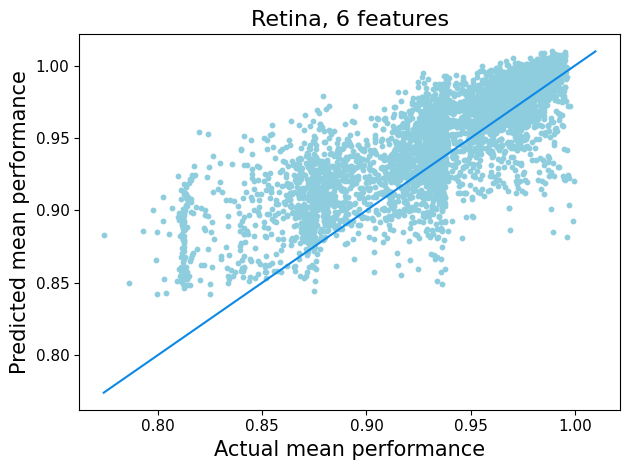

In [13]:
plt.scatter(model_prediction_res['test_label'], model_prediction_res['test_pred'], s=10, c=blues[1])
start = min(model_prediction_res['test_label'].min(), model_prediction_res['test_pred'].min())
stop = max(model_prediction_res['test_label'].max(), model_prediction_res['test_pred'].max())
plt.plot(np.linspace(start, stop, 50), np.linspace(start, stop, 50), c=blues[0])
plt.ylabel('Predicted mean performance', fontsize=15)
plt.xlabel('Actual mean performance', fontsize=15)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.title(
    f"{task.capitalize()}, 6 features",
    wrap=True, fontsize=16)
plt.tight_layout()
plt.savefig(f"{plot_path}/{time_str}_nn_model_pred_vs_actual.png")
plt.show()

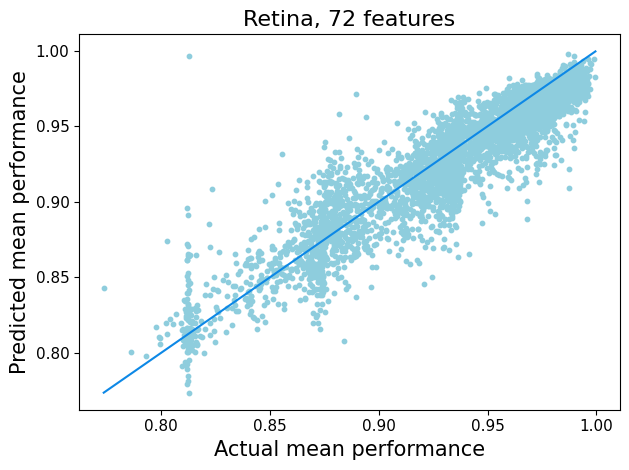

In [14]:
model_res_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}/72_prediction_results.csv"
model_prediction_res = pd.read_csv(model_res_path)
plt.scatter(model_prediction_res['test_label'], model_prediction_res['test_pred'], s=10, c=blues[1])
start = min(model_prediction_res['test_label'].min(), model_prediction_res['test_pred'].min())
stop = max(model_prediction_res['test_label'].max(), model_prediction_res['test_pred'].max())
plt.plot(np.linspace(start, stop, 50), np.linspace(start, stop, 50), c=blues[0])
plt.ylabel('Predicted mean performance', fontsize=15)
plt.xlabel('Actual mean performance', fontsize=15)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.title(
    f"{task.capitalize()}, 72 features",
    wrap=True, fontsize=16)
plt.tight_layout()
plt.savefig(f"{plot_path}/{time_str}_nn_model_pred_vs_actual_max.png")
plt.show()

In [ ]:
n_features = 6
baseline_path = f"{results_path}/{res_folder}/random_feature_selection/{n_features}_features/teach_archs_regression_random_feature_selection_results"
res_baseline = pd.DataFrame()
for file_name in os.listdir(baseline_path):
    if '_output_best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{baseline_path}/{file_name}")
    res_baseline = pd.concat([res_baseline, temp], ignore_index=True)

In [ ]:
correlated_path = f"{results_path}/{res_folder}/feature_correlation/{n_features}_features"
for file_name in os.listdir(correlated_path):
    if '_output_best.csv' not in file_name:
        continue
    res_corr = pd.read_csv(f"{correlated_path}/{file_name}")

In [ ]:
globality_path = f"{results_path}/{res_folder}/feature_globality/{n_features}_features/teach_archs_regression_feature_selection_results"
globality_baseline_res = pd.DataFrame()
for file_name in os.listdir(globality_path):
    if '_output_best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{globality_path}/{file_name}")
    globality_baseline_res = pd.concat([globality_baseline_res, temp], ignore_index=True)

In [ ]:
res_baseline.to_csv(f'/Users/noamazmon/{file_name}')

In [ ]:
from scipy import stats
stats.ttest_1samp(res_baseline['best mape test'], 0.017062)


In [ ]:
stats.ttest_1samp(globality_baseline_res['best mape test'], 0.017062, alternative='less')


In [ ]:
(globality_baseline_res['best mape test'].mean(), globality_baseline_res['best mape test'].std())

In [ ]:
import numpy as np
import scipy.stats as stats

# Given information
alpha = 0.05

# compute the z-score
z_score = (0.017062-globality_baseline_res['best mape test'].mean())/(globality_baseline_res['best mape test'].std())
print('Z-Score :',z_score)

# Approach 1: Using Critical Z-Score

# Critical Z-Score
z_critical = stats.norm.ppf(1-alpha)
print('Critical Z-Score :',z_critical)

# Hypothesis
if z_score >  z_critical:
    print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

# Approach 2: Using P-value

# P-Value : Probability of getting less than a Z-score
p_value = 1-stats.norm.cdf(z_score)

print('p-value :',p_value)

# Hypothesis
if p_value <  alpha:
    print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

In [ ]:
z_score = (0.017062 - res_baseline['best mape test'].mean()) / (
    res_baseline['best mape test'].std())
print('Z-Score :', z_score)

# Approach 1: Using Critical Z-Score

# Critical Z-Score
z_critical = stats.norm.ppf(1 - alpha)
print('Critical Z-Score :', z_critical)

# Hypothesis
if z_score > z_critical:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

# Approach 2: Using P-value

# P-Value : Probability of getting less than a Z-score
p_value = 1 - stats.norm.cdf(z_score)

print('p-value :', p_value)

# Hypothesis
if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")


In [ ]:
(globality_baseline_res['best mape test'].mean() - 0.017062)/ globality_baseline_res['best mape test'].std()

In [ ]:
all_data = [
    res_baseline['best mape test'],
    globality_baseline_res['best mape test'],
    res_corr['best mape test'],
    feature_selection_res['best mape test'][feature_selection_res['num_features'] == n_features],
]
labels = [
    'randomly chosen\nfeatures',
    'globality based randomly\nchosen features',
    'features correlated\nwith chosen features',
    'chosen with\nfeature selection',
]
plt.figure(figsize=(7, 8), )

plt.hlines(y=feature_selection_res['best mape test'][feature_selection_res['num_features'] == n_features], xmin=0.6,
           xmax=len(all_data) + 0.2, colors='grey', linestyles='--', alpha=0.5,
           label='features correlated with chosen features')
parts = plt.violinplot(all_data,
                       vert=True,
                       showmeans=True,
                       # vertical box alignment
                       #labels=labels
                       )
for pc in parts['bodies']:
    pc.set_facecolor(blues[1])
for partname in ('cbars', 'cmins', 'cmaxes',):
    vp = parts[partname]
    vp.set_edgecolor(blues[0])
plt.xticks([y + 1 for y in range(len(all_data))],
           labels=labels, rotation=18)
plt.ylabel(f'Mean absolute percentage error')
plt.suptitle(
    f"Mean absolute percentage error on test set of an ANN predicting the mean performance of a network from it's structural features - {n_features} features chosen in different ways - {task}",
    #loc='center',
    wrap=True)
plt.savefig(f"{plot_path}/{time_str}_differently_chosen_features_{n_features}_features_means.png")
plt.tight_layout()
plt.show()

In [ ]:
all_data = [
    res_baseline['best mape test'].mean(),
    globality_baseline_res['best mape test'].mean(),
    res_corr['best mape test'],
    feature_selection_res['best mape test'][feature_selection_res['num_features'] == n_features],
]
labels = [
    'randomly chosen\nfeatures (mean)',
    'globality based randomly\nchosen features (mean)',
    'features correlated\nwith chosen features',
    'chosen with\nfeature selection',
]
plt.figure(figsize=(7, 8), )
plt.hlines(y=feature_selection_res['best mape test'][feature_selection_res['num_features'] == n_features], xmin=0.6,
           xmax=len(all_data) + 0.2, colors='grey', linestyles='--', alpha=0.5,
           label='features correlated with chosen features')
parts = plt.violinplot(all_data,
                       vert=True,
                       showmeans=True,
                       # vertical box alignment
                       #labels=labels
                       )
for pc in parts['bodies']:
    pc.set_facecolor(blues[1])
for partname in ('cbars', 'cmins', 'cmaxes',):
    vp = parts[partname]
    vp.set_edgecolor(blues[0])
plt.xticks([y + 1 for y in range(len(all_data))],
           labels=labels, rotation=18)
plt.ylabel(f'Mean absolute percentage error')
plt.suptitle(
    f"Mean absolute percentage error on test set of an ANN predicting the mean performance of a network from it's structural features - {n_features} features chosen in different ways - {task}",
    #loc='center',
    wrap=True)
plt.savefig(f"{plot_path}/{time_str}_mean_differently_chosen_features_{n_features}_features_means.png")
plt.tight_layout()
plt.show()

In [ ]:
orignaly_chosen_features_values = pd.read_csv(f"{lgb_res_path}/{n_features}_feature_values.csv").drop("Unnamed: 0",
                                                                                                      axis=1)
originaly_selected_feature_names = list(orignaly_chosen_features_values.columns)[:-1]

corrlated_selected_feature_names = [
    correlated_features[feature].drop(index=feature).idxmax()
    for feature in originaly_selected_feature_names
]

In [ ]:
num_columns = int(np.ceil(len(originaly_selected_feature_names) / 2))
fig, axs = plt.subplots(num_columns, 2, figsize=(12, 16), )
min_x = 1.0
max_x = 0
idxs = []
r, c, = axs.shape
for i in range(r):
    for j in range(c):
        idxs.append((i, j))
for k, (origin_f_name, coor_f_name, (i, j)) in enumerate(
        zip(originaly_selected_feature_names, corrlated_selected_feature_names, idxs)):
    correlation_val = round(correlated_features[origin_f_name].loc[coor_f_name], 3)
    axs[i, j].scatter(corrlated_features_values[origin_f_name], corrlated_features_values[coor_f_name],
                      color=blues[1], s=3)
    axs[i, j].set_xlabel(textwrap.fill(origin_f_name.replace('_', ' '), width=30,
                                       break_long_words=False), fontsize=12)
    axs[i, j].set_ylabel(textwrap.fill(coor_f_name.replace('_', ' '), width=30,
                                       break_long_words=False), fontsize=12)
    axs[i, j].set_title(f'Correlation value {correlation_val}')
    axs[i, j].tick_params(axis='x', labelsize=12)
    axs[i, j].tick_params(axis='y', labelsize=12)
plt.suptitle(f"The distribution of selected features as a function of the feature most correlated with it")
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_{n_features}_correlated_features_dist.png")


In [ ]:
num_columns = int(np.ceil(len(originaly_selected_feature_names) / 2))
fig, axs = plt.subplots(num_columns, 2, figsize=(12, 16), )
min_x = 1.0
max_x = 0
idxs = []
r, c, = axs.shape
for i in range(r):
    for j in range(c):
        idxs.append((i, j))
for k, (origin_f_name, coor_f_name, (i, j)) in enumerate(
        zip(originaly_selected_feature_names, corrlated_selected_feature_names, idxs)):
    correlation_val = round(correlated_features[origin_f_name].loc[coor_f_name], 3)
    x_data = corrlated_features_values[origin_f_name]
    y_data = corrlated_features_values[coor_f_name]
    axs[i, j].scatter(x_data + np.random.normal(scale=0.5, size=x_data.shape[0]),
                      y_data + np.random.normal(scale=0.5, size=y_data.shape[0]),
                      color=blues[1], s=0.2)
    axs[i, j].set_xlabel(textwrap.fill(origin_f_name.replace('_', ' '), width=30,
                                       break_long_words=False), fontsize=12)
    axs[i, j].set_ylabel(textwrap.fill(coor_f_name.replace('_', ' '), width=30,
                                       break_long_words=False), fontsize=12)
    axs[i, j].set_title(f'Correlation value {correlation_val}')
    axs[i, j].tick_params(axis='x', labelsize=12)
    axs[i, j].tick_params(axis='y', labelsize=12)
plt.suptitle(
    f"The distribution of selected features as a function of the feature most correlated with it - noise added")
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_{n_features}_noise_correlated_features_dist.png")


In [ ]:
correlated_features

In [ ]:
NICE_FEATURES = [
    'connectivity_ratio',
    'num_connections',
    'max_possible_connections',
    'out_connections_per_layer',
    'in_connections_per_layer',
    'total_connectivity_ratio_between_layers',
    'max_connectivity_between_layers_per_layer',
    'layer_connectivity_rank',
    'distances_between_input_neuron',
    'num_paths_to_output_per_input_neuron',
    'num_involved_neurons_in_paths_per_input_neuron',
    'motifs_count',
    'dimensions',
    'num_layers',
    'num_neurons'
]
all_ticks = []
for feature_full_name in correlated_features.columns:
    for feature_general_name in NICE_FEATURES:
        if feature_general_name == 'connectivity_ratio' and feature_general_name != feature_full_name:
            continue
        if feature_general_name in feature_full_name:
            all_ticks.append(feature_general_name)
labels = []
for name in all_ticks:
    if name not in labels:
        labels.append(name)
texts = []
colors_ = []
for i, tick in enumerate(labels):
    temp = [i for i, val in enumerate(all_ticks) if val == tick]
    tick = tick.replace('connectivity_ratio', 'density').replace('_', ' ')
    if len(temp) == 1:
        texts.append(f"{temp[0]}: {tick}")
    else:
        texts.append(f"{temp[0]} - {temp[-1]}: {tick}")
    for j in range(temp[-1] - temp[0] + 1):
        colors_.append(COLORS_20[i])

In [ ]:
col = 'Blues'

fig = plt.figure(figsize=(18, 12), constrained_layout=True, dpi=300)
gs = fig.add_gridspec(2, 4)
axs = []
axs.append(fig.add_subplot(gs[:, 3]))
axs.append(fig.add_subplot(gs[:, 0:3]))  # large subplot (2 rows, 2 columns)
axtxt, ax = axs
c = sns.color_palette(col, as_cmap=True)
ax = sns.heatmap(correlated_features, linewidth=0.5, cmap=c, )
ax.set_xticks(range(0, correlated_features.shape[0], 1))
ax.set_xticklabels(list((range(0, correlated_features.shape[0], 1))))
ax.set_yticks(range(0, correlated_features.shape[0], 1))
ax.set_yticklabels(list((range(0, correlated_features.shape[0], 1))))
for xtick, yticks, color, in zip(ax.get_xticklabels(), ax.get_yticklabels(), colors_):
    xtick.set_color(color)
    yticks.set_color(color)
axtxt.set_axis_off()
left, width = 0.0, .5
top, height = 0.95, 1
right = left + width
bottom = top - height
for i, (t, c) in enumerate(zip(texts, COLORS_20)):
    axtxt.text(0.5 * (left + right), ((top) - i * 0.03), t,
               horizontalalignment='left',
               verticalalignment='top',
               fontsize=12, color=c,
               #  transform=axtxt.transAxes,
               )
plt.title(f"{task} - feature correlation (abs)")
plt.savefig(
    f"{plot_path}/{time_str}_{task}_feature_correlation.png")
plt.show()
print('a')




In [ ]:
plt.figure(figsize=(26,24), dpi = 300)
c = sns.color_palette(col, as_cmap=True)
correlated_features_new_name = correlated_features.copy()
correlated_features_new_name.columns = all_ticks
correlated_features_new_name.index = all_ticks
s =sns.clustermap(correlated_features_new_name, linewidth=0.5, cmap=c,cbar_pos=(1,0.21,0.03,0.6,),figsize=(26,24))
s.savefig(
    f"{plot_path}/{time_str}_{task}_feature_correlation_with_clustering.png")
plt.show()

In [ ]:
lgb_res_small_nn_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}/teach_archs_regression_feature_selection_results_small_ann"
num_features = []
feature_selection_small_ann_res = pd.DataFrame()
for file_name in os.listdir(lgb_res_small_nn_path):
    if 'best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{lgb_res_small_nn_path}/{file_name}")
    temp['num_features'] = int(file_name.split('only_')[1].split('_features')[0])
    feature_selection_small_ann_res = pd.concat([feature_selection_small_ann_res, temp], ignore_index=True)
feature_selection_small_ann_res = feature_selection_small_ann_res.sort_values('num_features')

In [ ]:
plt.plot(feature_selection_small_ann_res['num_features'], feature_selection_small_ann_res['best mape train'],
         label='train', c=blues[1])
plt.plot(feature_selection_small_ann_res['num_features'], feature_selection_small_ann_res['best mape test'],
         label='test', c=blues[0])

plt.xlabel('number of features', fontsize=12)
plt.ylabel(f'Mean absolute percentage error', fontsize=12)
plt.legend()
plt.title(
    f"Prediction of an ANN based on structural features {task.capitalize()}",
    wrap=True, fontsize=12)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape_small_ann.png")
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 6), sharex='all', sharey='all')
max_y = max((feature_selection_res['best mape test'].max(), feature_selection_res['best mape train'].max(),
             feature_selection_small_ann_res['best mape test'].max(),
             feature_selection_small_ann_res['best mape train'].max()))
min_y = min((feature_selection_res['best mape test'].min(), feature_selection_res['best mape train'].min(),
             feature_selection_small_ann_res['best mape test'].min(),
             feature_selection_small_ann_res['best mape train'].min()))
ax1.vlines(ymax=max_y, x=n_features, ymin=min_y, color='grey', linestyles='--', alpha=0.8)
ax2.vlines(ymax=max_y, x=n_features, ymin=min_y, color='grey', linestyles='--', alpha=0.8)
ax1.plot(feature_selection_small_ann_res['num_features'], feature_selection_small_ann_res['best mape train'],
         label='samll ANN', c=blues[1])
ax1.plot(feature_selection_res['num_features'], feature_selection_res['best mape train'], label='big ANN', c=blues[0])
ax2.plot(feature_selection_small_ann_res['num_features'], feature_selection_small_ann_res['best mape test'],
         label='samll ANN', c=blues[1])
ax2.plot(feature_selection_res['num_features'], feature_selection_res['best mape test'], label='big ANN', c=blues[0])

ax1.set_xlabel('number of features', fontsize=12)
ax2.set_xlabel('number of features', fontsize=12)
ax1.set_ylabel(f'Mean absolute percentage error', fontsize=12)
ax1.set_title('train data')
ax2.set_title('test data')
ax1.legend()
ax2.legend()
plt.suptitle(
    f"Prediction of an ANN based on structural features {task.capitalize()}",
    wrap=True, fontsize=16)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape_big_vs_smal_ann.png")
plt.show()